In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'./first_project.csv')

In [3]:
df['booking status'] = df['booking status'].replace('Not_Canceled', 'Not Canceled')

# 1. Booking Status Distribution
This gives us a quick overview of the percentage of cancellations versus successful bookings, helping to analyze customer behavior.

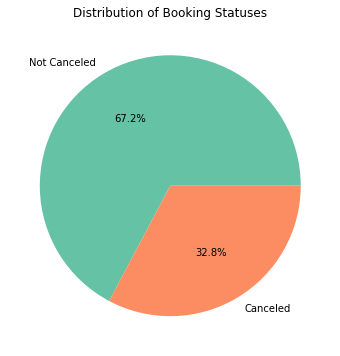

In [4]:
status_counts = df['booking status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Booking Statuses')
plt.show()

# 2. Average Lead Time by Booking Status

This plot helps to understand if there's a difference in the lead time for bookings that were canceled vs. not canceled.

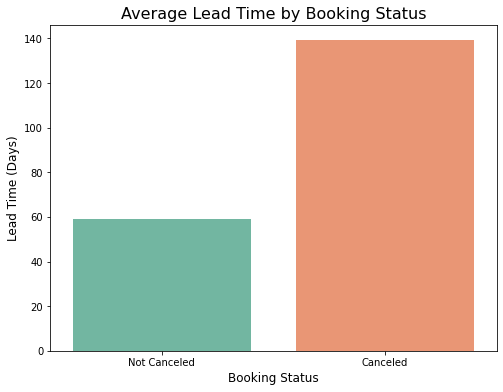

In [5]:
plt.figure(figsize=(8, 6))
sns.barplot(x='booking status', y='lead time', data=df,  hue='booking status', palette='Set2', errorbar=None)

plt.title('Average Lead Time by Booking Status', fontsize=16)
plt.xlabel('Booking Status', fontsize=12)
plt.ylabel('Lead Time (Days)', fontsize=12)
plt.show()

# 3. Impact of Special Requests on Booking Cancellations¶
Assess if customers making more special requests are more or less likely to cancel their bookings.

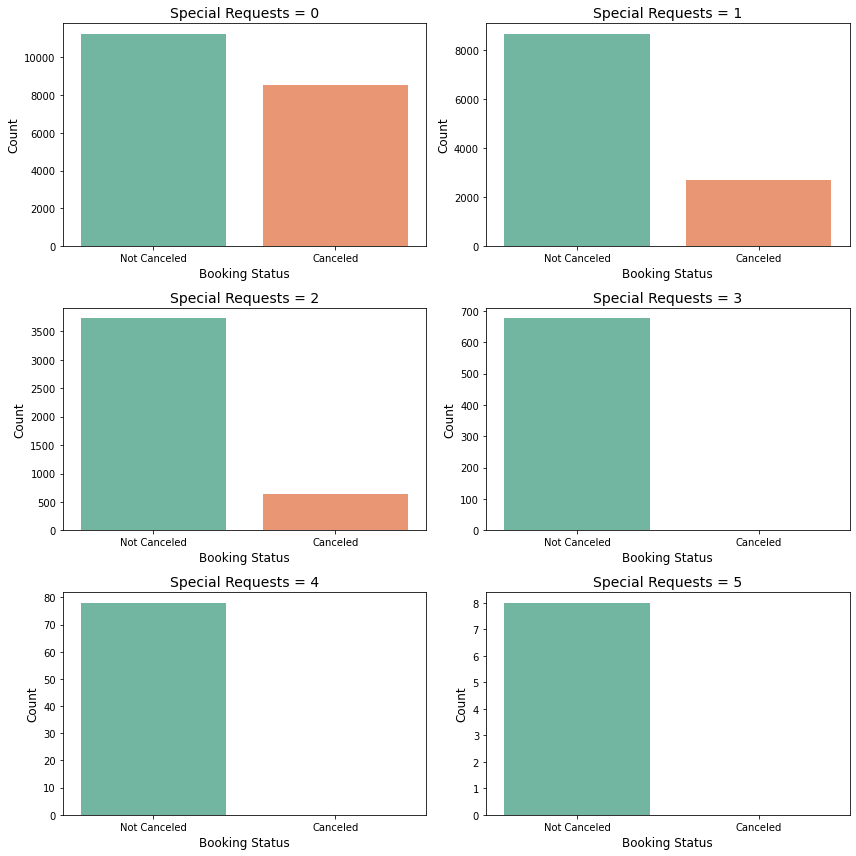

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()
set2_palette = sns.color_palette('Set2')

#ensuring color and order consistency
palette = {
    'Not Canceled': set2_palette[0],  # The first color in Set2
    'Canceled': set2_palette[1]       # The second color in Set2
}
order = ['Not Canceled', 'Canceled']

# Loop through the number of special requests from 0 to 5
for i, special_request_value in enumerate(range(6)):
    data_filtered = df[df['special requests'] == special_request_value]
    sns.countplot(x='booking status', data=data_filtered, hue='booking status', palette=palette, order=order, ax=axes[i])
    
    axes[i].set_title(f'Special Requests = {special_request_value}', fontsize=14)
    axes[i].set_xlabel('Booking Status', fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()